In [155]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Advanced Numerical Methods for ODEs

## Comet Orbits

The following program will solve for the position and energy of a comet. The function _orbit_ will use the following strategy:

1. Define the _gravrk_ function used by Runga-Kutta routines
2. Set the initial position and velocity of the comet
3. Set physical parameters (m, GM, etc)
4. Loop over desired number of steps using specified numerical method
    - Record position and energy for plotting
    - Calculate new position using:
        - Euler method, or
        - Euler-Cromer method, or
        - Fourth-order Runga-Kutta, or
        - Adaptive Runga-Kutta
5. Graph the trajectory of the comet
6. Graph the energy of the comet vs time

In [162]:
def orbit():
    ''' Computes the orbit of a comet around the sun using either Euler, Euler-Cromer, 
    fourth-order Runga-Kutta, or adaptive Runga-Kutta.
    '''
    
    # Set up configuration options and special features
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Un-comment the import lines when using .py scripts. Otherwise, call the functions from 
    # this notebook.
    
#     from nm4p.rk4 import rk4
#     from nm4p.rka import rka

    # Set initial position and velocity of the comet
    r0 = float(input('Enter initial radial distance (AU): '))
    v0 = float(input('Enter initial tangential velocity (AU/yr): '))
    r = np.array([r0, 0])
    v = np.array([0, v0])
    state = np.array([r[0], r[1], v[0], v[1]])
    
    # Set physical parameters
    GM = 4 * np.pi**2     # Grav const * mass of sun (au^3 / yr^2)
    mass = 1.0            # Mass of comet
    adaptErr = 1.0e-3     # Error parameter used by adaptive Runga-Kutta
    time = 0.0
    
    # Loop over desired number of steps using specified method
    nStep = int(input('Enter number of steps: '))
    tau = float(input('Enter time step (yr): '))
    numericalMethod = int(input('Choose method: 1) Euler; 2) Euler-Cromer; 3) Runga-Kutta; 4) Adaptive Runga-Kutta'))
    rplot = np.empty(nStep)
    thplot = np.empty(nStep)
    tplot = np.empty(nStep)
    kinetic = np.empty(nStep)
    potential = np.empty(nStep)
    
    for istep in range(nStep):
        
        # Record position and energy for plotting
        rplot[istep] = np.linalg.norm(r)
        thplot[istep] = np.arctan2(r[0], r[1])
        tplot[istep] = time
        kinetic[istep] = 0.5 * mass * np.linalg.norm(v)**2
        potential[istep] = -GM * mass / np.linalg.norm(r)
        
        # Calculate new position using desired method
        if numericalMethod == 1:   # Euler
            accel = -GM * r / np.linalg.norm(r)**3
            r += tau * v
            v += tau * accel
            time += tau
        elif numericalMethod == 2: # Euler-Cromer
            accel = -GM * r / np.linalg.norm(r)**3
            v += tau * accel
            r += tau * v
            time += tau
        elif numericalMethod == 3: # Fourth-order Runga-Kutta
            state = rk4(state, time, tau, gravrk, GM)
            r = np.array([state[0], state[1]])
            v = np.array([state[2], state[3]])
            time += tau
        else:
            [state, time, tau] = rk4a(state, time, tau, adaptErr, gravrk, GM)
            r = np.array([state[0], state[1]])
            v = np.array([state[2], state[3]])
            
    # Graph the comet trajectory
    ax = plt.subplot(111, projection='polar')
    ax.plot(thplot, rplot, '+')
    ax.set_title('Distance from sun (AU)')
    ax.grid(True)
    plt.show()
        
    # Graph the energy of the comet vs time
    totalE = kinetic + potential
    plt.plot(tplot, kinetic, '-.', tplot, potential, '--', tplot, totalE, '-')
    plt.legend(['Kinetic', 'Potential', 'Total'])
    plt.xlabel('Time (yr)')
    plt.ylabel(r'Energy ($M AU^2/yr^2$)')
    plt.show()

In [154]:
def gravrk(s, t, GM):
    ''' gravrk function used by the Runga-Kutta routines.
    Returns the right-hand side of the Kepler ODE.
    Inputs
    ------
        s     State vector [r(1) r(2) v(1) v(2)]
        t     Time (not used)
        GM    Parameter G*M (gravitational const * solar mass)
    Outputs
    -------
        deriv Derivatives [dr(1)/dt dr(2)/dt dv(1)/dt dv(2)/dt]
    '''
    
    # Compute acceleration
    r = np.array([s[0], s[1]])
    v = np.array([s[2], s[3]])
    accel = -GM * r / np.linalg.norm(r)**3   # Gravitational acceleration
    
    # Return derivatives [dr(1)/dt dr(2)/dt dv(1)/dt dv(2)/dt]
    deriv = np.array([v[0], v[1], accel[0], accel[1]])
    return deriv

In [155]:
def rk4(x, t, tau, derivsRK, param):
    ''' Runga-Kutta, fourth-order
    Inputs
    ------
        x = current value of dependent variable
        t = independent variable
        tau = step size
        derivsRK = right-hand side of ODE; derivsRK is the
            name of the function that returns dx/dt.
            Calling format is derivsRK (x, t, param)
        param = extra parameters passed to derivsRK
    Outputs
    -------
        xout = new value of x after a step of size tau
    '''
    
    half_tau = 0.5 * tau
    F1 = derivsRK(x, t, param)
    t_half = t + half_tau
    xtemp = x + half_tau * F1
    F2 = derivsRK(xtemp, t_half, param)
    xtemp = x + half_tau * F2
    F3 = derivsRK(xtemp, t_half, param)
    t_full = t + tau
    xtemp = x + tau * F3
    F4 = derivsRK(xtemp, t_full, param)
    xout = x + tau/6. * (F1 + F4 + 2 * (F2 + F3))
    return xout

Enter initial radial distance (AU):  1
Enter initial tangential velocity (AU/yr):  6.28
Enter number of steps:  200
Enter time step (yr):  0.02
Choose method: 1) Euler; 2) Euler-Cromer; 3) Runga-Kutta; 4) Adaptive Runga-Kutta 1


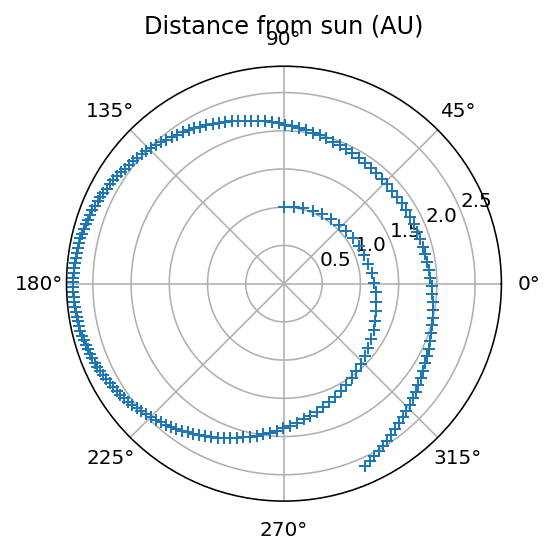

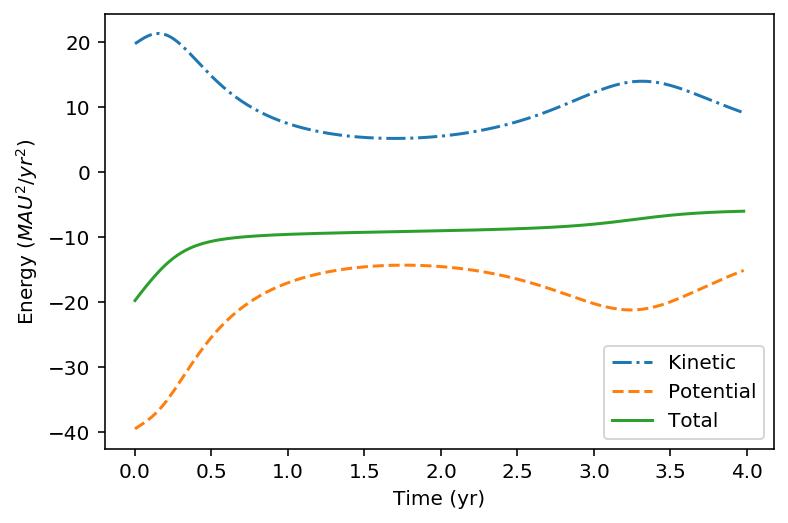

In [14]:
orbit()

Using Euler, the orbit spirals outward. From the energy graph, we can see that the total energy is increasing instead of remaining constant. Let's use Euler-Cromer instead and see what the results are.

Enter initial radial distance (AU):  1
Enter initial tangential velocity (AU/yr):  6.28
Enter number of steps:  200
Enter time step (yr):  0.02
Choose method: 1) Euler; 2) Euler-Cromer; 3) Runga-Kutta; 4) Adaptive Runga-Kutta 2


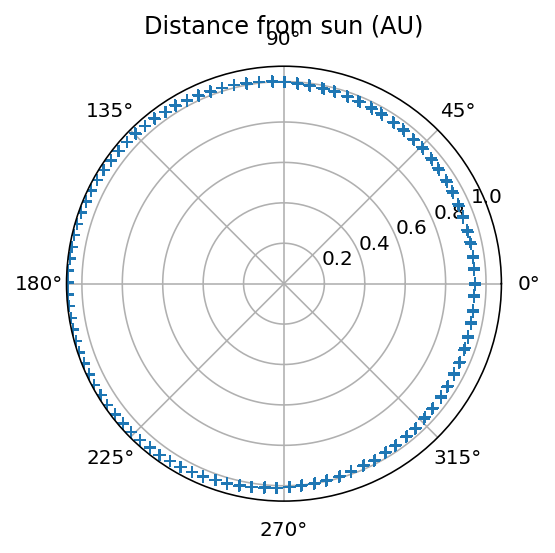

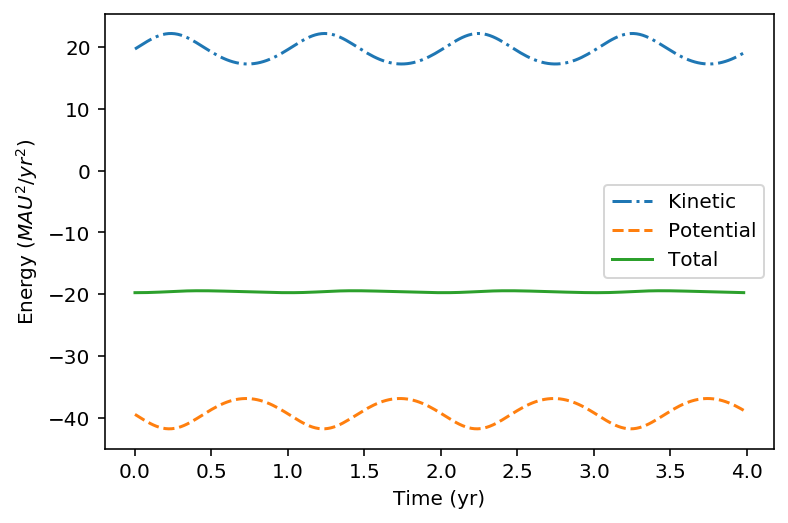

In [15]:
orbit()

Enter initial radial distance (AU):  1
Enter initial tangential velocity (AU/yr):  3.14
Enter number of steps:  200
Enter time step (yr):  0.02
Choose method: 1) Euler; 2) Euler-Cromer; 3) Runga-Kutta; 4) Adaptive Runga-Kutta 2


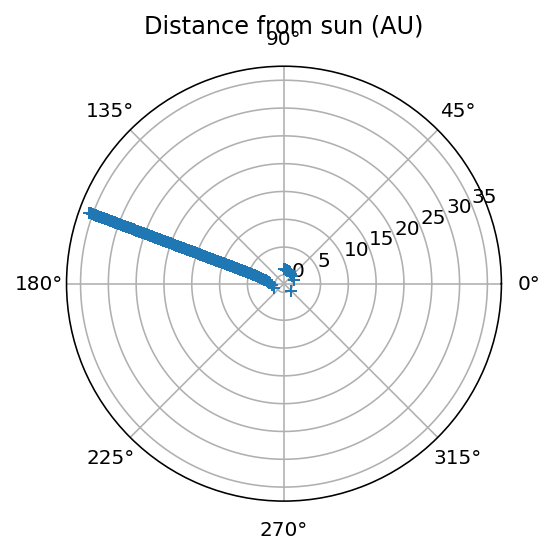

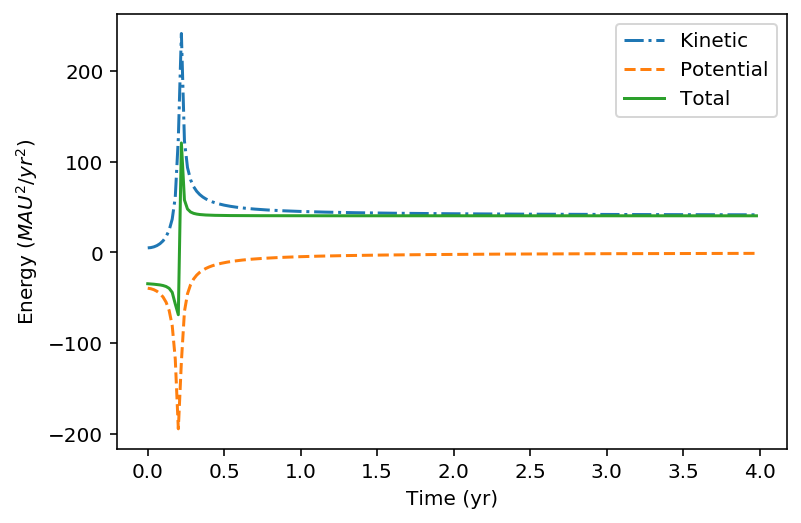

In [17]:
orbit()

This first result with Euler-Cromer is much better. Recall that the only difference between the Euler method and the Euler-Cromer method is that the velocity step is computed first, and this is used to update the position. We can see that the orbit is nearly circular, and total energy is conserved. 

The second iteration, a lower initial velocity is used, and due to numerical error, then energy becomes positive and the comet achieves escape velocity. Using a smaller time step should work, but it will create a higher-eccentricity orbit that this method has problems with. One may think that the problem is physical rather than numerical. This is where better approximations, such as Runga-Kutta methods come in.

Enter initial radial distance (AU):  1
Enter initial tangential velocity (AU/yr):  3.14
Enter number of steps:  200
Enter time step (yr):  0.005
Choose method: 1) Euler; 2) Euler-Cromer; 3) Runga-Kutta; 4) Adaptive Runga-Kutta 2


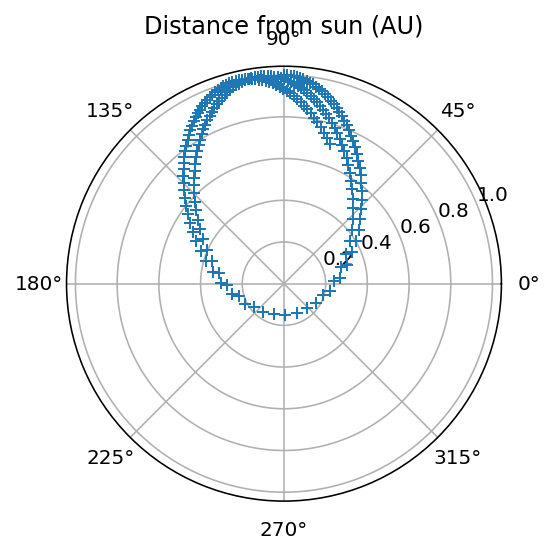

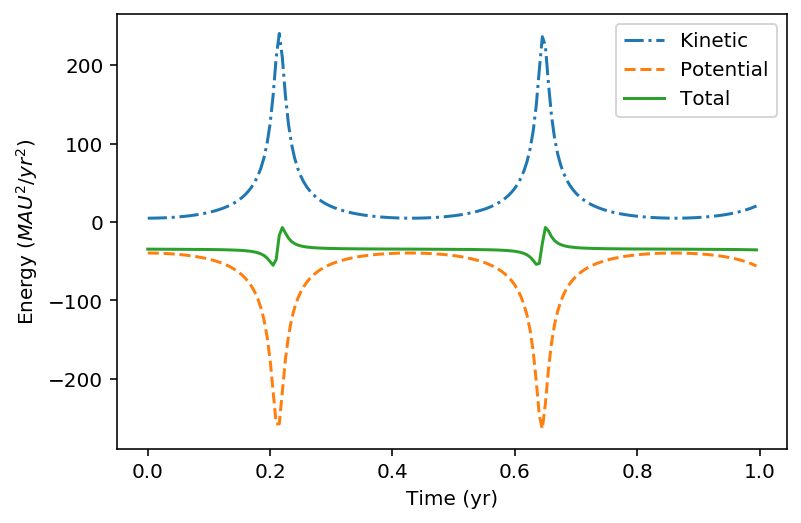

In [18]:
orbit()

## Exercise 1

Prove that is the earth lost all orbital velocity, that it would reach the sun in about 65 days.

In [47]:
G = 6.67e-11
M = 1.99e30
m = 5.972e24
r = 1.496e11

In [48]:
v0 = 0.
r0 = 1.496e11
tau = 1 # seconds
time = 0.
while r >= 1:
    a = -(G*m*M/r**2)/m
    v = v0 + tau * a
    r = r0 + tau * v
    v0 = v
    r0 = r
    time += tau

In [49]:
time * (1/3600) * (1/24)

64.56528935185185

The above code uses Euler-Cromer to update velocity and position for the earth that is initially stationary at 1 AU. The time step is 1 second, but the results were close when a time step of 1 hour was used.

## Exercise 3

Modify _orbit_ so that instead of running for a fixed number of time steps, the program stops when the satellite completes one orbit. Have the program compute the period, eccentricity, semimajor axis, and perihelion distance of the orbit.

In [209]:
def orbit_mod():
    ''' Computes the orbit of a comet around the sun using either Euler, Euler-Cromer, 
    fourth-order Runga-Kutta, or adaptive Runga-Kutta.
    '''
    
    # Set up configuration options and special features
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Un-comment the import lines when using .py scripts. Otherwise, call the functions from 
    # this notebook.
    
#     from nm4p.rk4 import rk4
#     from nm4p.rka import rka

    # Set initial position and velocity of the comet
    r0 = float(input('Enter initial radial distance (AU): '))
    v0 = float(input('Enter initial tangential velocity (AU/yr): '))
    r = np.array([r0, 0])
    v = np.array([0, v0])
    state = np.array([r[0], r[1], v[0], v[1]])
    
    # Set physical parameters
    GM = 4 * np.pi**2     # Grav const * mass of sun (au^3 / yr^2)
    mass = 1.0            # Mass of comet
    adaptErr = 1.0e-3     # Error parameter used by adaptive Runga-Kutta
    time = 0.0
    
    # Loop over desired number of steps using specified method
    tau = float(input('Enter time step (yr): '))
    numericalMethod = int(input('Choose method: 1) Euler; 2) Euler-Cromer; 3) Runga-Kutta; 4) Adaptive Runga-Kutta'))
    rplot = []
    thplot = []
    tplot = []
    kinetic = []
    potential = []
    theta0 = np.arctan2(r0, 0)
    flag = True
    
    while flag:
        
        # Record position and energy for plotting
        rplot.append(np.linalg.norm(r))
        thplot.append(np.arctan2(r[0], r[1]))
        tplot.append(time)
        kinetic.append(0.5 * mass * np.linalg.norm(v)**2)
        potential.append(-GM * mass / np.linalg.norm(r))
        
        # Calculate new position using desired method
        if numericalMethod == 1:   # Euler
            accel = -GM * r / np.linalg.norm(r)**3
            r += tau * v
            v += tau * accel
            time += tau
        elif numericalMethod == 2: # Euler-Cromer
            accel = -GM * r / np.linalg.norm(r)**3
            v += tau * accel
            r += tau * v
            time += tau
        elif numericalMethod == 3: # Fourth-order Runga-Kutta
            state = rk4(state, time, tau, gravrk, GM)
            r = np.array([state[0], state[1]])
            v = np.array([state[2], state[3]])
            time += tau
        else:
            [state, time, tau] = rka(state, time, tau, adaptErr, gravrk, GM)
            r = np.array([state[0], state[1]])
            v = np.array([state[2], state[3]])
        
        if time > r0 * 100 * tau and np.abs(theta0 - thplot[-1])*180/np.pi < 1:
            flag = False
        
#         if time > 10000 * tau:
#             print('Solution diverging. Stopping.')
#             flag = False
            
    # Graph the comet trajectory
    ax = plt.subplot(111, projection='polar')
    ax.plot(thplot, rplot, '+')
    ax.plot(thplot[0], rplot[0], 'ro')
    ax.set_title('Distance from sun (AU)')
    ax.grid(True)
    plt.show()
        
    # Graph the energy of the comet vs time
    totalE = np.array(kinetic) + np.array(potential)
    plt.plot(tplot, kinetic, '-.', label='Kinetic')
    plt.plot(tplot, potential, '--', label='Potential')
    plt.plot(tplot, totalE, '-', label='Total')
    plt.legend()
    plt.xlabel('Time (yr)')
    plt.ylabel(r'Energy ($M AU^2/yr^2$)')
    plt.show()
    
    #b = rplot[np.abs(45 - np.array(thplot)*180/np.pi).argmin()]*np.sin(thplot[np.abs(45 - np.array(thplot)).argmin()])
    #a1 = rplot[thplot==90.]
    #a2 = rplot[np.abs(-90 - np.array(thplot)*180/np.pi).argmin()]
    a1 = max(rplot)
    a2 = min(rplot)
    a = (a1 + a2) / 2
    b = np.sqrt(a1 * a2)
    e = np.sqrt(1 - b**2/a**2)
    period_calc = np.sqrt(4*np.pi**2*a**3/(GM))
    KE_avg = np.mean(kinetic)
    PE_avg = np.mean(potential)
    
    print(f'Semimajor axis: {a:.2f} (AU)')
    print(f'Perihelion from data: {min(rplot):.2f} (AU)')
    print(f'Perihelion from calc: {(1 - e)*a:.2f} (AU)')
    print(f'Period from data: {tplot[-1]:.2f} years')
    print(f'Period from calc: {period_calc:.2f}')
    
    return period_calc, a, KE_avg, PE_avg

Enter initial radial distance (AU):  2
Enter initial tangential velocity (AU/yr):  3.5
Enter time step (yr):  0.005
Choose method: 1) Euler; 2) Euler-Cromer; 3) Runga-Kutta; 4) Adaptive Runga-Kutta 2


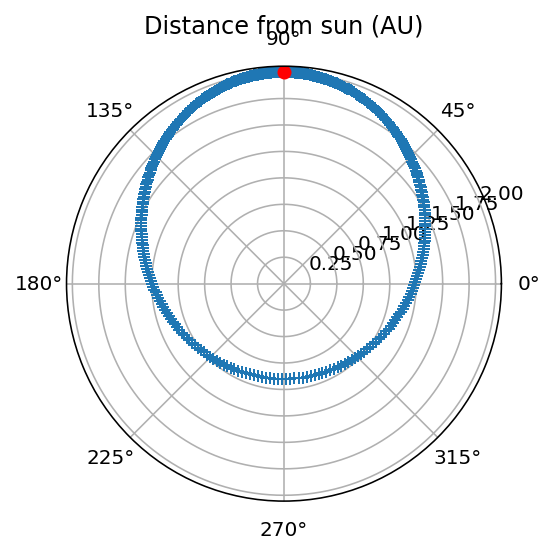

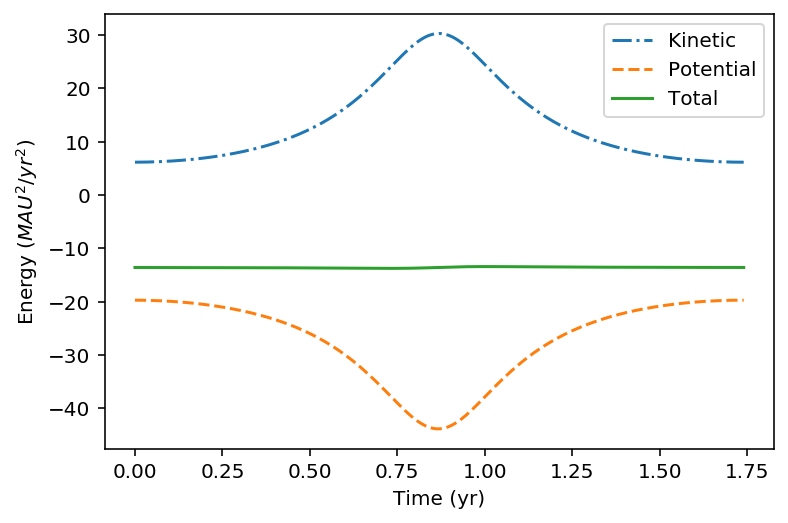

Semimajor axis: 1.45 (AU)
Perihelion from data: 0.90 (AU)
Perihelion from calc: 0.90 (AU)
Period from data: 1.74 years
Period from calc: 1.75


In [198]:
period, a, KE, PE = orbit_mod()

The second part of Exercise 3 is to show that the program confirms Kepler's third law, which states that the square of the orbital period of a satellite is directly proportional to the cube of the semi-major axis of the orbit. The program was modified to return the period and the semimajor axis. From wikipedia, the ratio of the cube of the semimajor axis and the square of the period should equal $7.496 x 10^{-6} \frac{AU^3}{days^2}$. Therefore, the period needs to be converted from years to days.

In [199]:
a**3/period**2 *(1/365**2)

7.506098705197975e-06

In [200]:
np.abs(a**3/period**2 *(1/365**2) - 7.496e-6) / 7.496e-6

0.00134721253975124

The error in the result in confirming Kepler's third law is less than 1%. The third part of the exercise is to confirm that the time-averaged kinetic energy is equal to $-0.5$ times the time-averaged potential energy. The function above was modified to calculate these averages and return the results.

In [201]:
KE + PE/2

0.0018880277174702087

And we can see from the results that the virial theorem is obeyed for the numerical analysis.

## Exercise 6

Halley's comet has an initial radial distance of approximately 35 AU. We'll need some experimentation with the initial velocity and the time steps to make sure energy is conserved. 

Enter initial radial distance (AU):  35
Enter initial tangential velocity (AU/yr):  .1853
Enter time step (yr):  0.005
Choose method: 1) Euler; 2) Euler-Cromer; 3) Runga-Kutta; 4) Adaptive Runga-Kutta 2


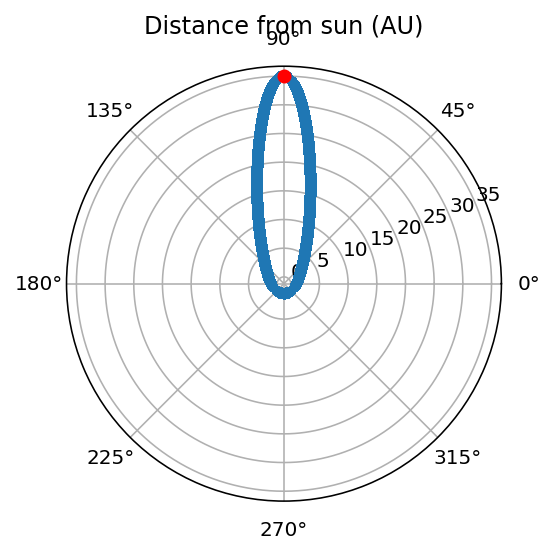

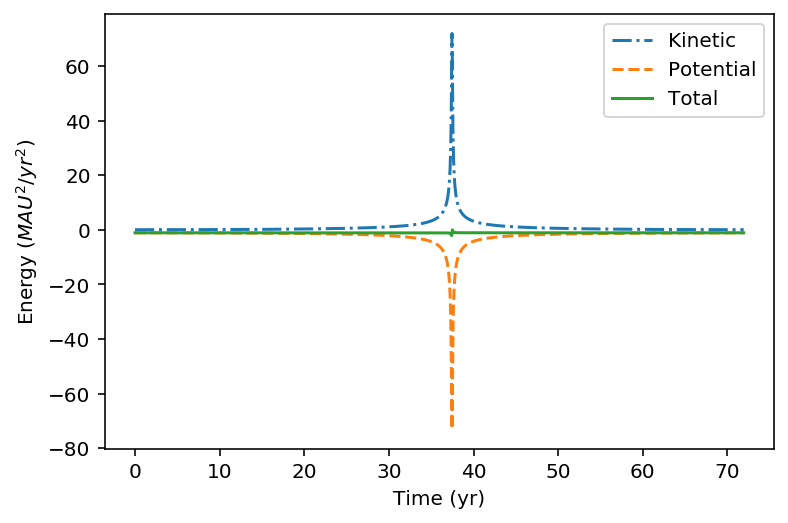

Semimajor axis: 17.77 (AU)
Perihelion from data: 0.54 (AU)
Perihelion from calc: 0.54 (AU)
Period from data: 71.93 years
Period from calc: 74.91


In [214]:
period, a, KE, PE = orbit_mod()

Above, I used the long radial distance of 35 AU and the aphelion velocity of 0.879 km/sec (0.1853 AU/yr). This produced the expected orbital period of 75 years. Checking Kepler's third law and the virial theorem:

In [215]:
np.abs(a**3/period**2 *(1/365**2) - 7.496e-6) / 7.496e-6

0.001347212539751014

In [216]:
KE + PE/2

0.022633918230650307

Looks like there's an error of about 2.3% in the energy from the virial theorem.

## Exercise 7

The Lorentz force on a charged particle is:

$$ \textbf{F} = q(\textbf{E} +  \textbf{v} x \textbf{B}) $$

Write a program to simulate the motion of an electron in a uniform electric and magnetic field.

The acceleration of the particle is given by $F/m$, which yields:

$$ \textbf{a} = \frac{q}{m}(\textbf{E} +  \textbf{v} x \textbf{B}) $$

For these uniform fields, we will consider an electric field with a y-component and a magnetic field with a z-component:

$$ \textbf{E} = (0, E, 0); \textbf{B} = (0, 0, B) $$

This means the cross-product of the velocity and magnetic field will only have an x and y component if the initial velocity has an x and y component.

We will use the acceleration to update the velocity, and then to update the position using Euler-Cromer.

In [327]:
def lorentz(v, q, m, E, B, tau):
    ''' Calculate the motion of a charged particle due to Lorentz forced exerted in a uniform
    electric and magnetic field. The electric and magnetic fields should have a single component. 
    '''
    import numpy as np
    import matplotlib.pyplot as plt
    nSteps = 500
    time = 0.0
    rplot = np.empty((nSteps, 3))
    vplot = np.empty((nSteps, 3))
    tplot = np.empty((nSteps, 3))
    r = np.array([0., 0., 0.])
    for step in range(nSteps):
        accel = q/m * (E + np.cross(v, B))
        v += tau * accel
        r += tau * v
        rplot[step] = r
        vplot[step] = v
        tplot[step] = time + tau
    
    return rplot, vplot, rplot

In [366]:
v = np.array([.1, .1, 0.])
B = np.array([0., 0., 6e-4])
E = np.array([0., 1e-1, 0.])
q = 1e-3
m = 1e-6
tau = 0.1

In [367]:
rplot, vplot, r = lorentz(v, q, m, E, B, tau)

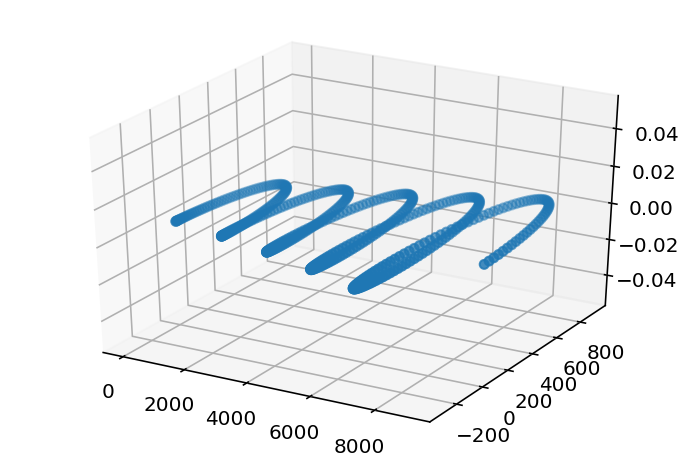

In [368]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rplot[:, 0], rplot[:, 1], rplot[:, 2])
plt.show()

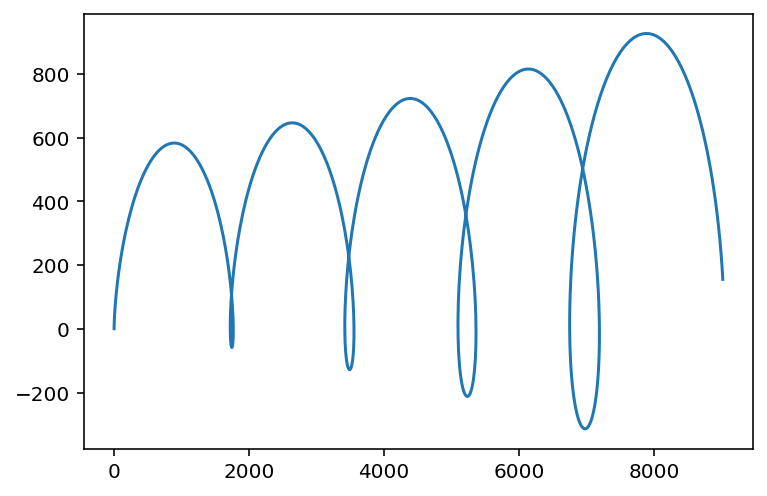

In [365]:
plt.plot(rplot[:, 0], rplot[:, 1])

Not knowing much about electromagnetism, this was my best effort. The problem itself is 3D, with a z-component (axis 2) of the magnetic field. However, the cross product of the velocity and the magnetic field result in acceleration only in the x-y plane, and we see the velocity changing in that plane, but not in the z-direction.

## Runga-Kutta

A general ODE is of the form:

$$ \frac{d\textbf{x}}{dt} = \textbf{F}(\textbf{x}(t), t) $$

where $x$ is the state vector and is the desired solution. Runga-Kutta seeks to update solutions with a half-time step. This is because the Taylor expansion for a first derivative yields:

$$ x(t + \tau) = x(t) + \tau \frac{dx(\zeta)}{dt} $$

$$ = x(t) + \tau f(x(\zeta), \zeta) $$

In the Euler method, $\zeta = t$. Euler-Cromer also uses this, but it first updates the velocity and then uses $v(t + \tau)$ to update the position. Runga-Kutta attepts to use $\zeta = t + 1/2 \tau$. However, $x(t + \frac{1}{2}\tau)$ is not known, so it uses an Euler step to approximate it.

For example, taking the ODE $\frac{dx}{dt} = -x$, we can solve for the first few values using a step size $\tau = 0.2$. The starred computations occur at the half-steps. If $x_0 = 1$:

$$ x^*(0.1) = 1 + 0.1(-1) = 0.9 $$

$$ x(0.2) = 1 + 0.2(-0.9) = 0.82 $$

$$ x^*(0.3) = 0.82 + 0.1(-0.82) = 0.738 $$

$$ x(0.4) = 0.82 + 0.1(-0.738) = 0.6724 $$

Compare this with the actual solution $e^{-0.4} = 0.6703$.

### Fourth-Order Runga-Kutta

This update looks like:

$$x(t + \tau) = x(t) + \frac{1}{6}\tau[F_1 + 2F_2 + 2F_3 + F_4] $$

where:

$$F_1 = f(x, t)$$

$$F_2 = f(x + \frac{1}{2}\tau F_1, t = \frac{1}{2}\tau)$$

$$F_3 = f(x + \frac{1}{2}\tau F_2, t = \frac{1}{2}\tau)$$

$$F_4 = f(x + \tau F_3, t + \tau)$$

See the notes on this chapter for an example of using fourth-order Runga-Kutta.

Enter initial radial distance (AU):  1
Enter initial tangential velocity (AU/yr):  3.14159
Enter number of steps:  200
Enter time step (yr):  0.005
Choose method: 1) Euler; 2) Euler-Cromer; 3) Runga-Kutta; 4) Adaptive Runga-Kutta 3


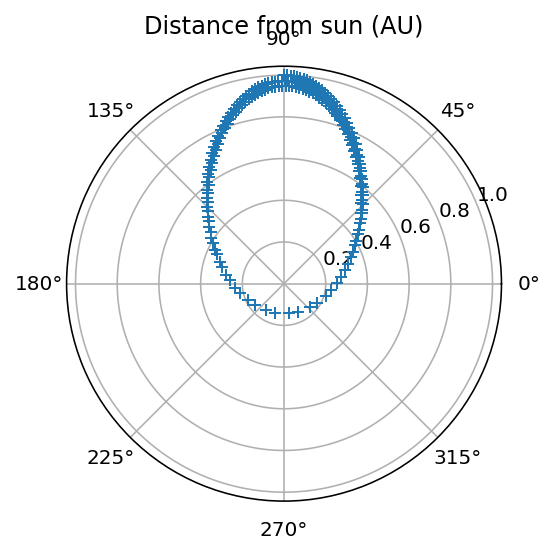

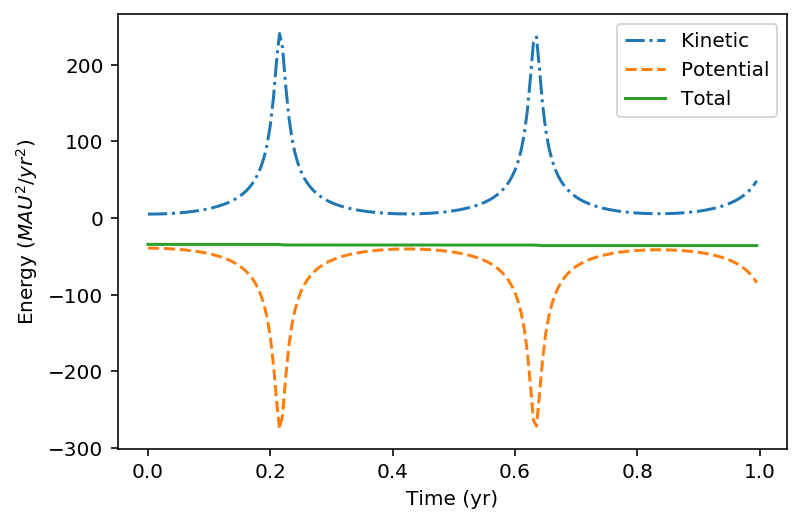

In [371]:
orbit()

The total potential energy remains constant for the entire simulation.

In [497]:
def rungakutta4():
    points = []
    y = 10
    dt = np.pi/30
    t = 0
    npoints = 30
    for i in range(npoints):
        F1 = -10*np.sin(t)
        t_half = t + dt/2
        ytemp = y + F1*dt/2
        F2 = -10*np.sin(t_half)
        ytemp = y + F2*dt/2
        F3 = -10*np.sin(t_half)
        t += dt
        ytemp = y + F3*dt
        F4 = -10*np.sin(t)
    
        m = 1/6. * (F1 + 2*F2 + 2*F3 + F4)
        yout = y + m*dt
        points.append(yout)
        y = yout
    return points, t

In [498]:
rk, t  = rungakutta4()

In [499]:
np.array(rk)

array([ 9.94521895e+00,  9.78147600e+00,  9.51056514e+00,  9.13545454e+00,
        8.66025398e+00,  8.09016986e+00,  7.43144815e+00,  6.69130593e+00,
        5.87785235e+00,  4.99999979e+00,  4.06736618e+00,  3.09016966e+00,
        2.07911658e+00,  1.04528426e+00, -4.17699298e-07, -1.04528509e+00,
       -2.07911741e+00, -3.09017049e+00, -4.06736702e+00, -5.00000063e+00,
       -5.87785319e+00, -6.69130676e+00, -7.43144898e+00, -8.09017070e+00,
       -8.66025482e+00, -9.13545538e+00, -9.51056598e+00, -9.78147683e+00,
       -9.94521979e+00, -1.00000008e+01])

In [500]:
t

3.141592653589794

In [501]:
x = np.linspace(0., np.pi, 30)

In [502]:
x

array([0.        , 0.10833078, 0.21666156, 0.32499234, 0.43332312,
       0.54165391, 0.64998469, 0.75831547, 0.86664625, 0.97497703,
       1.08330781, 1.19163859, 1.29996937, 1.40830016, 1.51663094,
       1.62496172, 1.7332925 , 1.84162328, 1.94995406, 2.05828484,
       2.16661562, 2.2749464 , 2.38327719, 2.49160797, 2.59993875,
       2.70826953, 2.81660031, 2.92493109, 3.03326187, 3.14159265])

In [503]:
y = 10*np.cos(x)

In [504]:
y

array([ 10.        ,   9.94137957,   9.76620556,   9.47653171,
         9.0757542 ,   8.56857176,   7.96093066,   7.25995492,
         6.47386285,   5.61187065,   4.68408441,   3.70138155,
         2.67528339,   1.61781997,   0.54138909,  -0.54138909,
        -1.61781997,  -2.67528339,  -3.70138155,  -4.68408441,
        -5.61187065,  -6.47386285,  -7.25995492,  -7.96093066,
        -8.56857176,  -9.0757542 ,  -9.47653171,  -9.76620556,
        -9.94137957, -10.        ])

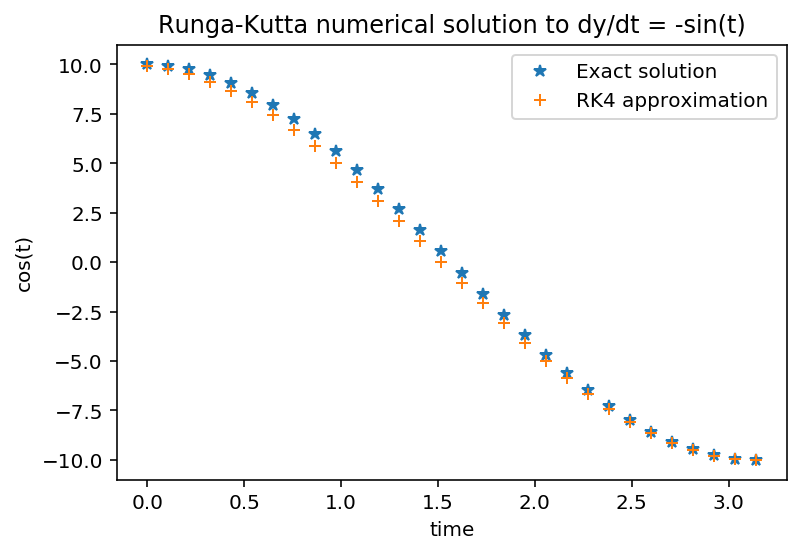

In [505]:
plt.plot(x, y, '*', label='Exact solution')
plt.plot(x, rk, '+', label='RK4 approximation')
plt.title('Runga-Kutta numerical solution to dy/dt = -sin(t)')
plt.xlabel('time')
plt.ylabel('cos(t)')
plt.legend()

## Exercise 9

Write a program to reproduce figure 3.6 using the second-order Runga-Kutta equations 3.19 and 3.20 with $\tau = 1$.

The first-order ODE to be solved is $dx/dt = -x$, with $x_0 = 1$. Figure 3.6 shows a quiver plot of the slope field, along with an Euler half-step and a Runga-Kutta step. First, do the Euler half-step.

In [511]:
tau = 1
half_tau = tau/2
x0 = 1

x_new = x0 - half_tau * x0

Now, take a full Runga-Kutta step:

In [515]:
xtemp = x0 + half_tau*(-x0)
x = x0 + tau * (-xtemp)

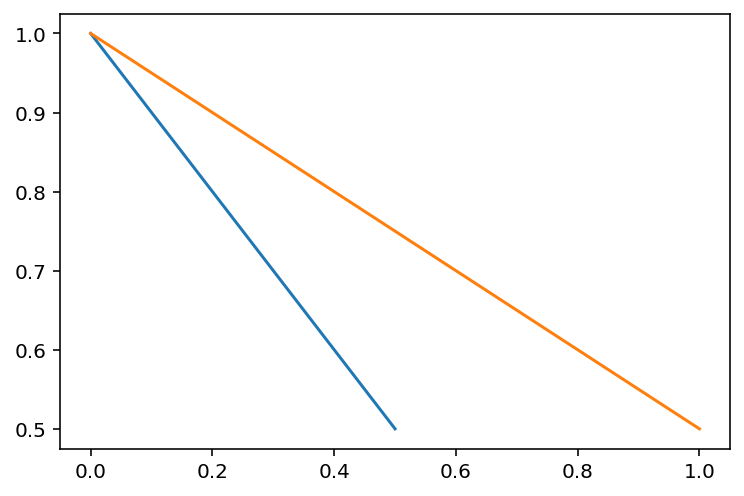

In [516]:
plt.plot([0, half_tau], [x0, x_new])
plt.plot([0, tau], [x0, x])

In [518]:
t = np.arange(0, 1.1, 0.1)

In [552]:
xslope = -np.arange(1, -.1, -0.1)

In [521]:
xvals = np.arange(0, 1.1, 0.1)

In [522]:
T, X = np.meshgrid(t, xvals)

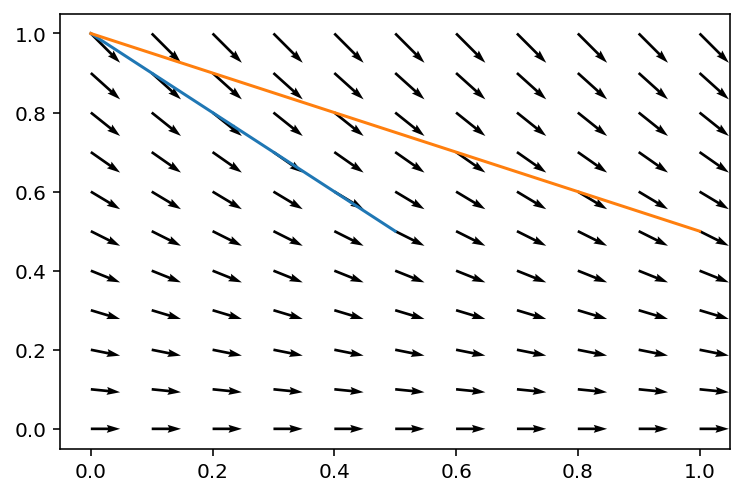

In [581]:
plt.quiver(T, X, 1, -X, width=0.004)
plt.plot([0, half_tau], [x0, x_new])
plt.plot([0, tau], [x0, x])

## Exercise 12

Modify the orbit program to account for a large but distant object applying a force from one direction, whose magnitude it 1% of the initial gravitational force. Show that the circular orbit is transformed into an elliptical orbit with the semimajor axis perpendicular to the force axis. Graph angular momentum

In [23]:
def orbit_mod2():
    ''' Computes the orbit of a comet around the sun using either Euler, Euler-Cromer, 
    fourth-order Runga-Kutta, or adaptive Runga-Kutta.
    
    Uses a perturbing force of 1% of the initial gravitational force
    '''
    
    # Set up configuration options and special features
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Un-comment the import lines when using .py scripts. Otherwise, call the functions from 
    # this notebook.
    
#     from nm4p.rk4 import rk4
#     from nm4p.rka import rka

    # Set initial position and velocity of the comet
    r0 = float(input('Enter initial radial distance (AU): '))
    v0 = float(input('Enter initial tangential velocity (AU/yr): '))
    r = np.array([r0, 0.])
    r_ = r.copy()
    v = np.array([0., v0])
    F = np.array([1, 1]) # create the initial force vector from the distant object
    state = np.array([r[0], r[1], v[0], v[1]])
    
    # Set physical parameters
    GM = 4 * np.pi**2     # Grav const * mass of sun (au^3 / yr^2)
    mass = 1.0            # Mass of comet
    adaptErr = 1.0e-3     # Error parameter used by adaptive Runga-Kutta
    time = 0.0
    
    # Loop over desired number of steps using specified method
    nStep = int(input('Enter number of steps: '))
    tau = float(input('Enter time step (yr): '))
    numericalMethod = int(input('Choose method: 1) Euler; 2) Euler-Cromer; 3) Runga-Kutta; 4) Adaptive Runga-Kutta'))
    rplot = np.empty(nStep)
    thplot = np.empty(nStep)
    tplot = np.empty(nStep)
    kinetic = np.empty(nStep)
    potential = np.empty(nStep)
    vplot = np.empty(nStep)
    L = np.empty(nStep)
    
    for istep in range(nStep):
        
        # Record position and energy for plotting
        rplot[istep] = np.linalg.norm(r)
        thplot[istep] = np.arctan2(r[1], r[0])
        tplot[istep] = time
        kinetic[istep] = 0.5 * mass * np.linalg.norm(v)**2
        potential[istep] = -GM * mass / np.linalg.norm(r)
        #L[istep] = mass * np.sqrt(GM*np.linalg.norm(r))
        L[istep] = np.cross(r, mass*v)
        vplot[istep] = np.linalg.norm(v)
        
        # Calculate new position using desired method
        if numericalMethod == 1:   # Euler
            accel = -GM * r / np.linalg.norm(r)**3
            accel2 = 0.01 * np.linalg.norm((GM * r_ / np.linalg.norm(r_)**3)) * F # acceleration from distant object
            if istep <= 1. * nStep:
                accel_tot = accel + accel2
            else:
                accel_tot = accel
            r += tau * v
            v += tau * accel_tot
            time += tau
        elif numericalMethod == 2: # Euler-Cromer
            accel = -GM * r / np.linalg.norm(r)**3
            accel2 = 0.01 * np.linalg.norm((GM * r_ / np.linalg.norm(r_)**3)) * F # acceleration from distant object
            if istep <= 1. * nStep:
                accel_tot = accel + accel2
            else:
                accel_tot = accel
            v += tau * accel_tot
            r += tau * v
            time += tau
        elif numericalMethod == 3: # Fourth-order Runga-Kutta
            state = rk4_mod(state, time, tau, gravrk_mod, GM, r_, F, istep, nStep)
            r = np.array([state[0], state[1]])
            v = np.array([state[2], state[3]])
            time += tau
        else:
            [state, time, tau] = rka(state, time, tau, adaptErr, gravrk_mod, GM, r_, F)
            r = np.array([state[0], state[1]])
            v = np.array([state[2], state[3]])
            
    # Graph the comet trajectory
    ax = plt.subplot(111, projection='polar')
    ax.plot(thplot, rplot, '+')
    ax.set_title('Distance from sun (AU)')
    ax.grid(True)
    plt.show()
        
    # Graph the energy of the comet vs time
    totalE = kinetic + potential
    plt.plot(tplot, kinetic, '-.', tplot, potential, '--', tplot, totalE, '-')
    plt.legend(['Kinetic', 'Potential', 'Total'])
    plt.xlabel('Time (yr)')
    plt.ylabel(r'Energy ($M AU^2/yr^2$)')
    plt.show()
    
    # Graph the angular momentum
    plt.plot(tplot, L, '--')
    plt.xlabel('Time (yr)')
    plt.ylabel('Angular momentum ($kg-AU^2/yr$)')
    plt.show()
    
    return L, vplot, rplot

In [20]:
def gravrk_mod(s, t, GM, r_, F, istep, nStep):
    ''' gravrk function used by the Runga-Kutta routines.
    Returns the right-hand side of the Kepler ODE.
    Inputs
    ------
        s     State vector [r(1) r(2) v(1) v(2)]
        t     Time (not used)
        GM    Parameter G*M (gravitational const * solar mass)
    Outputs
    -------
        deriv Derivatives [dr(1)/dt dr(2)/dt dv(1)/dt dv(2)/dt]
    '''
    
    # Compute acceleration
    r = np.array([s[0], s[1]])
    v = np.array([s[2], s[3]])
    #F = np.array([1, 0])
    accel = -GM * r / np.linalg.norm(r)**3   # Gravitational acceleration
    accel2 = 0.01 * np.linalg.norm((GM * r_ / np.linalg.norm(r_)**3)) * F # acceleration from distant object
    if istep <= 1. * nStep:
        accel_tot = accel + accel2
    else:
        accel_tot = accel
    
    # Return derivatives [dr(1)/dt dr(2)/dt dv(1)/dt dv(2)/dt]
    deriv = np.array([v[0], v[1], accel_tot[0], accel_tot[1]])
    return deriv

In [21]:
def rk4_mod(x, t, tau, derivsRK, param, r_, F, istep, nStep):
    ''' Runga-Kutta, fourth-order
    Inputs
    ------
        x = current value of dependent variable
        t = independent variable
        tau = step size
        derivsRK = right-hand side of ODE; derivsRK is the
            name of the function that returns dx/dt.
            Calling format is derivsRK (x, t, param)
        param = extra parameters passed to derivsRK
    Outputs
    -------
        xout = new value of x after a step of size tau
    '''
    
    half_tau = 0.5 * tau
    F1 = derivsRK(x, t, param, r_, F, istep, nStep)
    t_half = t + half_tau
    xtemp = x + half_tau * F1
    F2 = derivsRK(xtemp, t_half, param, r_, F, istep, nStep)
    xtemp = x + half_tau * F2
    F3 = derivsRK(xtemp, t_half, param, r_, F, istep, nStep)
    t_full = t + tau
    xtemp = x + tau * F3
    F4 = derivsRK(xtemp, t_full, param, r_, F, istep, nStep)
    xout = x + tau/6. * (F1 + F4 + 2 * (F2 + F3))
    return xout

Enter initial radial distance (AU):  1
Enter initial tangential velocity (AU/yr):  6.2832
Enter number of steps:  1000
Enter time step (yr):  0.005
Choose method: 1) Euler; 2) Euler-Cromer; 3) Runga-Kutta; 4) Adaptive Runga-Kutta 3


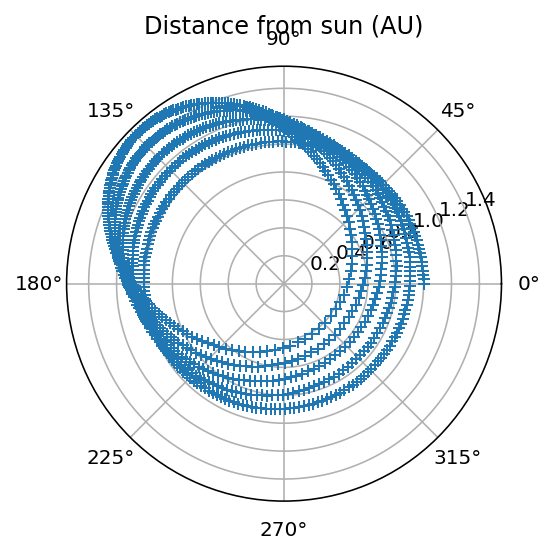

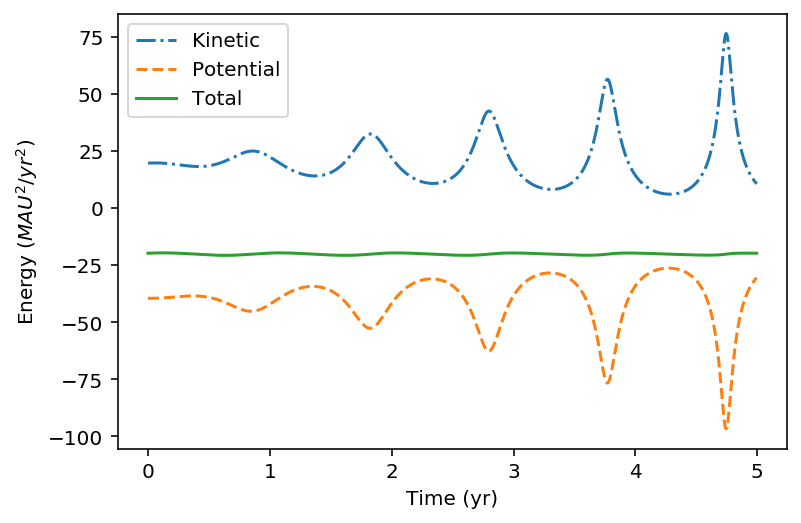

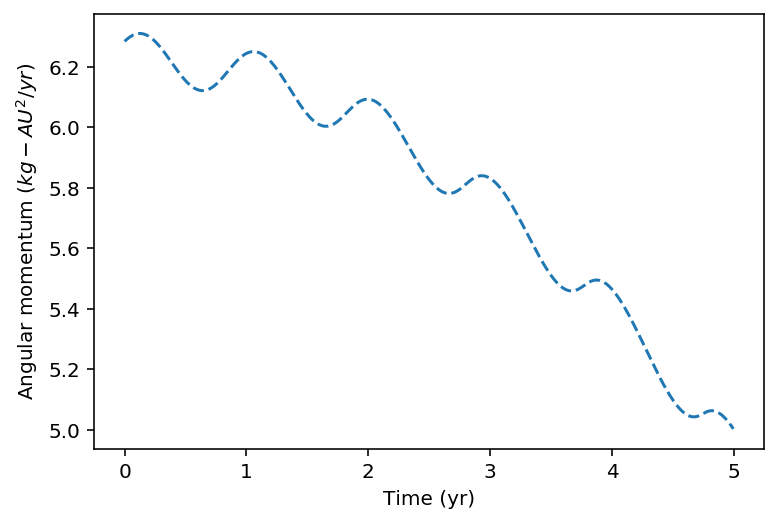

In [24]:
L, v, r = orbit_mod2()

Here, we see that the semimajor axis lies on the 135/315 degree axis, which is perpendicular to the applied axis of the force, which is the 45/225 degree axis. The orbit is never stable, as can be seen by the increasing potential energy, and eventually obtains escape velocity and is released into space. The satellite begins to lose angular momentum. In a circular orbit, angular momentum is conserved. Here, the perterbing force causes angular momentum to not be conserved. The radius from the sun decreases, which is the driving factor for losing momentum.

## Exercise 13

Find the equations of motionof the Wilberforce pendulum, given the Lagrangian. Then, write a program to compute $z(t)$ and $\theta (t)$ using fourth-order Runga-Kutta.

For the z-direction, the only forces are gravity and the force from the spring, along with the energy transfer between the longitudinal and rotational modes. Therefore:

$$\sum F_z = -mg + kz - \frac{1}{2}\epsilon\theta= ma_z$$

where $z$ is the displacement from 0. This makes the acceleration in the z-direction:

$$ -g + \frac{kz(t)}{m} - \frac{1}{2m}\epsilon\theta= a_z $$

$$ -g + \frac{kz(t)}{m} - \frac{1}{2m}\epsilon\theta = \frac{d^2z}{dt^2} $$

This is a second-order ODE, and needs to be written as a first-order system:

$$ y_1(t) = z(t) $$

$$ y_2(t) = y_1'(t) $$

This transforms the 2nd order ODE into:

$$ y_2' = -g + \frac{ky_1}{m} -\frac{1}{2m}\epsilon\theta = \frac{d^2z}{dt^2} $$

This is equivalent to the vector system:

$$ \frac{d}{dt}[y_1, y_2] = [y_2, -g + ky_1/m - 0.5/m * \epsilon\theta] = [f_1(t, y_1, y_2, y_3, y_4), f_2(t, y_1, y_2, y_3, y_4, params)] $$

Note that the gravitational term can be left off. Since it is a constant, it acts to change where the mass initially needs to be displaced from. Eliminating g moves the initial mass position to be $z=0$. Also note that the functions for each coefficient will be written in terms of all 4 variables (longitudinal position, longitudinal velocity, angular position, and angular velocity). For the torsional component:

$$ \tau = -\kappa\theta  - 0.5 * \epsilon z$$

is the torsional force from Hooke's law, with the coupling term included. This makes the force balance:

$$ \sum F_{\theta} = -\kappa\theta - 0.5 * \epsilon z = I\alpha $$

$$ \alpha = -\frac{\kappa\theta}{I} - \frac{\epsilon z}{2*I} $$

$$ \frac{d}{dt}[y_3, y_4] = [y_4, -\frac{\kappa y_3}{I} - \frac{\epsilon y_1}{2*I}]= [f_3(t, y_1, y_2, y_3, y_4), f_4(t, y_1, y_2, y_3, y_4, params)] $$

where $y_3 = \theta$ and $y_4 = y_3'$


Each function $f$ represents the right-hand side of the ODE. Writing each function with respect to every variable keeps the functions general, although not every variable will be used. The general strategy will be to compute $F1 - F4$ for each variable in sequence. The notation will be such that $F12$ is the $F1$ slope for $y_2$, $F23$ is the $F2$ slope for $y_3$, etc. Therefore, we will first solve for $F11, F12, F13$, and $F14$, and then move on to the $F2$ sequence. This is necessary because each subsequent slope uses the previous slope as an input. The variables are then stepped forward in the usual manner, that is: 

$$ y(t + \tau) = \frac{\tau}{6}(F1 + 2*F2 + 2*F3 + F4) $$

In [149]:
def wilberforce():
    g = 9.81          # gravity [m/s^2]
    m = 0.5           # mass of wheel [kg]
    k = 5.            # spring constant [N/m]
    z0 = -.1          # initial displacement [m]
    v0 = 0.           # initial velocity [m/s]          
    theta0 = np.pi/2  # initial angular displacement (radians)
    kappa = 1e-3      # torsional spring constant [N-m]
    I = 1e-4          # wheel mass moment of inertia [kg-m^2]
    omega0 = 0.       # initial angular velocity [rad/sec]
    eps = 0.5         # coupling between longitudinal and torsional motion [N]
    nsteps = 500
    t = np.empty(nsteps + 1)
    tau = 0.1
    y1 = np.empty(nsteps + 1)
    y2 = np.empty(nsteps + 1)
    y3 = np.empty(nsteps + 1)
    y4 = np.empty(nsteps + 1)
    y1[0] = z0
    y2[0] = v0
    y3[0] = theta0
    y4[0] = omega0
    t[0] = 0.
    
    def f1(t_, z, v, theta, omega):
        return v
    
    def f2(t_, z, v, theta, omega, g, m, k, eps):
        return -k * (z) / m - 0.5/m * eps * theta
    
    def f3(t_, z, v, theta, omega):
        return omega
    
    def f4(t_, z, v, theta, omega, kappa, I, eps):
        return -kappa * theta / I - 0.5/m * eps * z
    
    for i in range(1, nsteps+1):
        # calculate Runge-Kutta coefficients and step the state vector forward
        time = t[i-1]
        F11 = f1(time, y1[i-1], y2[i-1], y3[i-1], y4[i-1])
        F12 = f2(time, y1[i-1], y2[i-1], y3[i-1], y4[i-1], g, m, k, eps)
        F13 = f3(time, y1[i-1], y2[i-1], y3[i-1], y4[i-1])
        F14 = f4(time, y1[i-1], y2[i-1], y3[i-1], y4[i-1], kappa, I, eps)
        F21 = f1(time + tau/2, y1[i-1] + F11/2 * tau, y2[i-1] + F12/2 * tau, y3[i-1] + F13/2 * tau, y4[i-1] + F14/2 * tau)
        F22 = f2(time + tau/2, y1[i-1] + F11/2 * tau, y2[i-1] + F12/2 * tau, y3[i-1] + F13/2 * tau, y4[i-1] + F14/2 * tau, g, m, k, eps)
        F23 = f3(time + tau/2, y1[i-1] + F11/2 * tau, y2[i-1] + F12/2 * tau, y3[i-1] + F13/2 * tau, y4[i-1] + F14/2 * tau)
        F24 = f4(time + tau/2, y1[i-1] + F11/2 * tau, y2[i-1] + F12/2 * tau, y3[i-1] + F13/2 * tau, y4[i-1] + F14/2 * tau, kappa, I, eps)
        F31 = f1(time + tau/2, y1[i-1] + F21/2 * tau, y2[i-1] + F22/2 * tau, y3[i-1] + F23/2 * tau, y4[i-1] + F24/2 * tau)
        F32 = f2(time + tau/2, y1[i-1] + F21/2 * tau, y2[i-1] + F22/2 * tau, y3[i-1] + F23/2 * tau, y4[i-1] + F24/2 * tau, g, m, k, eps)
        F33 = f3(time + tau/2, y1[i-1] + F21/2 * tau, y2[i-1] + F22/2 * tau, y3[i-1] + F23/2 * tau, y4[i-1] + F24/2 * tau)
        F34 = f4(time + tau/2, y1[i-1] + F31/2 * tau, y2[i-1] + F32/2 * tau, y3[i-1] + F23/2 * tau, y4[i-1] + F24/2 * tau, kappa, I, eps)
        F41 = f1(time + tau, y1[i-1] + F31 * tau, y2[i-1] + F32 * tau, y3[i-1] + F33 * tau, y4[i-1] + F34 * tau)
        F42 = f2(time + tau, y1[i-1] + F31 * tau, y2[i-1] + F32 * tau, y3[i-1] + F33 * tau, y4[i-1] + F34 * tau, g, m, k, eps)
        F43 = f3(time + tau, y1[i-1] + F31 * tau, y2[i-1] + F32 * tau, y3[i-1] + F33 * tau, y4[i-1] + F34 * tau)
        F44 = f4(time + tau, y1[i-1] + F31 * tau, y2[i-1] + F32 * tau, y3[i-1] + F33 * tau, y4[i-1] + F34 * tau, kappa, I, eps)
        y1[i] = y1[i-1] + tau / 6 * (F11 + 2 * F21 + 2 * F31 + F41)
        y2[i] = y2[i-1] + tau / 6 * (F12 + 2 * F22 + 2 * F32 + F42)
        y3[i] = y3[i-1] + tau / 6 * (F13 + 2 * F23 + 2 * F33 + F43)
        y4[i] = y4[i-1] + tau / 6 * (F14 + 2 * F24 + 2 * F34 + F44)
        time = t[i-1]
        t[i] = t[i-1] + tau
        
    return t, y1, y2, y3, y4

In [150]:
t, z, v, theta, omega = wilberforce()

Text(0, 0.5, 'Displacement (cm)')

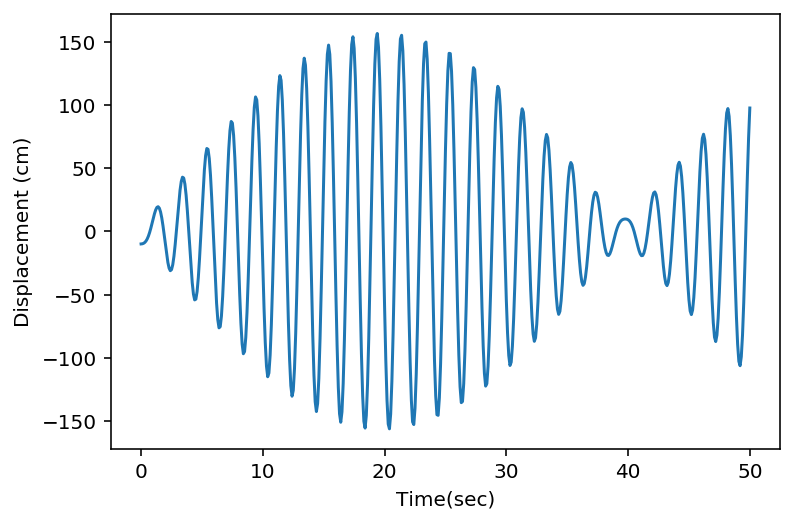

In [151]:
plt.plot(t, z*100)
plt.xlabel('Time(sec)')
plt.ylabel('Displacement (cm)')

Text(0, 0.5, 'Displacement (degrees)')

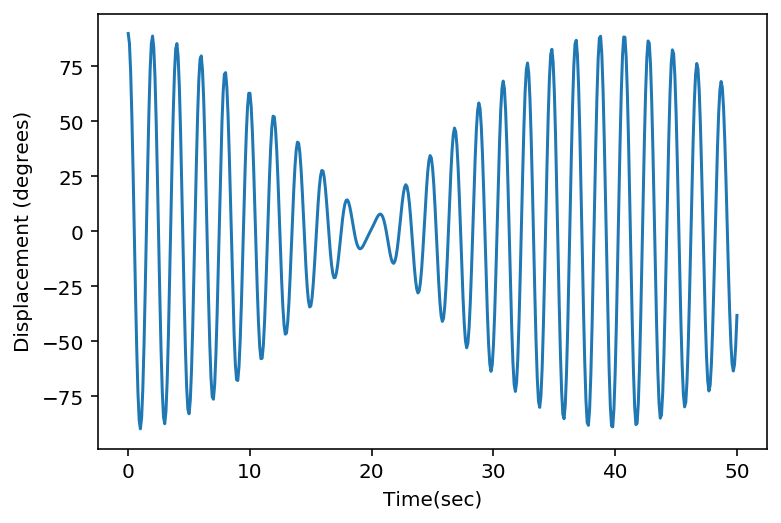

In [152]:
plt.plot(t, theta*180/np.pi)
plt.xlabel('Time(sec)')
plt.ylabel('Displacement (degrees)')

The book mentions that when the torsional frequency equals the longitudinal frequency, the pendulum alternates between being purely longitudinal and purely torsional. This means the ratio $\frac{k}{m}$ must equal the ratio $\frac{\kappa}{I}$.

# Adaptive Methods

## Adaptive Time Step

For the comet problem, a brute-force approach to the time step was used. That is, a time-step was selected that provided the desired accuracy. Adaptive methods will vary the time-step based on what the current error is. Let $\textbf{x}_f$ be the state vector obtained by taking a full time step from  $\textbf{x}_f(t)$ to $\textbf{x}_f(t + \tau)$. Let $\textbf{x}_h$ be the state vector obtained by taking two half time steps $t + \frac{\tau}{2}$ instead. The current error $\Delta_c$ is the difference between these two states, $|\textbf{x}_f - \textbf{x}_h|$. Since the fourth-order Runge-Kutta method is accurate to $\tau^5$, an estimate for the time step to be used based on the local truncation error is:

$$ \tau_{est} = \tau|\frac{\Delta_i}{\Delta_c}|^{1/5} $$

where $\Delta_i$ is the user-specified ideal error. When the current error is larger than the ideal error, the time step is reduced.

Since this is just an estimate, the new time step is computed by applying a constant $S_1 < 0$:

$$ \tau_{new} = \tau_{est}S_1 $$

The effect of $S_1$ is to make $\tau_{est}$ be larger than $\tau_{new}$. This will underestimate the time step when increasing it, and underestimate the time step reduction when lowering it.

A second constant can be used to prevent the frequency with which new time steps are created. This time step, $S_2$, is greater than 1, and is used to that the following three rules apply. $\tau_{new}$ is equal to:

1. $S_2\tau_{old}$ if $S_1\tau_{est} > S_2\tau_{old}$
2. $\tau_{old}/S_2$ if $S_1\tau_{est} < \tau_{old}/S_2$
3. $S_1\tau_{est}$ otherwise

These make sure that the new time step never increases or decreases by more than $S_2$.

In [158]:
def rka(x, t, tau, err, derivsRK, param):
    '''
    Adaptive Runge-Kutta routine
    Inputs
    ------
    x            Current value of the dependent variable
    t            Independent variable (usually time)
    tau          Step size (usually time)
    err          Desired fractional local truncation error
    derivsRK     Right-hand side of the ODE; derivsRK is the
                 name of the function that returns dx/dt.
                 Calling format: derivsRK(x, t, param)
    param        Extra parameter passed to derivsRK
    Outputs
    -------
    xSmall       New value of the dependent variable
    t            New value of the independent variable
    tau          Suggested step size for the next call
    '''
    
    # Set initial variables
    tsave, xsave = t, x     # Initial values
    s1, s2 = 0.9, 4.0       # Initial safety factors
    eps = 1e-15
    
    # Loop over max number of attempts to satifsy error bound
    xtemp = np.empty(len(x))
    xsmall = np.empty(len(x))
    xbig = np.empty(len(x))
    
    maxtry = 100
    for i in range(maxtry):
        
        # Take the two small time steps
        half_tau = 0.5 * tau
        xtemp = rk4(xsave, tsave, half_tau, derivsRK, param)
        t = tsave + half_tau
        xsmall = rk4(xtemp, t, half_tau, derivsRK, param)
        
        # Take a single big time step
        t = tsave + tau
        xbig = rk4(xsave, tsave, tau, derivsRK, param)
        
        # Compute the estimated truncation error
        scale = err * (np.abs(xsmall) + np.abs(xbig))/2.
        xdiff = xsmall - xbig
        errorRatio = np.max(np.abs(xdiff)/ (scale + eps))
        
        # Estimate the new tau
        tau_old = tau
        tau = s1 * tau_old * errorRatio**(-0.2)
        tau = max(tau, tau_old/s2)
        tau = min(tau, s2 * tau_old)
        
        # If error is acceptable, return computed values
        if errorRatio < 1:
            return np.array([xsmall, t, tau])
        
    # Issue error message if error bound never satisfied
    print('ERROR: Adaptive Runge-Kutta routine failed')
    return np.array([xsmall, t, tau])

Enter initial radial distance (AU):  1
Enter initial tangential velocity (AU/yr):  1.5708
Enter number of steps:  40
Enter time step (yr):  0.1
Choose method: 1) Euler; 2) Euler-Cromer; 3) Runga-Kutta; 4) Adaptive Runga-Kutta 4


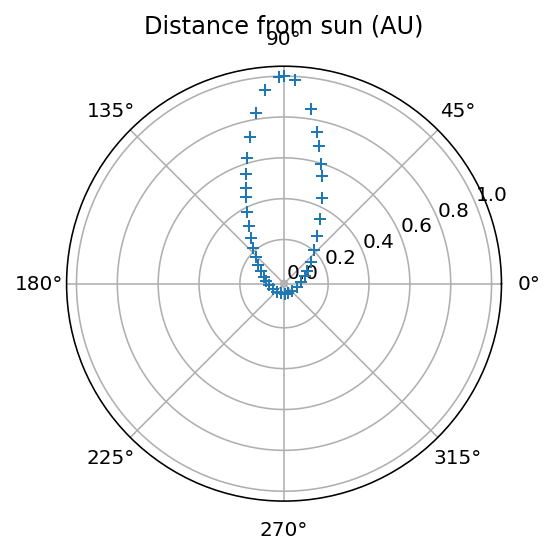

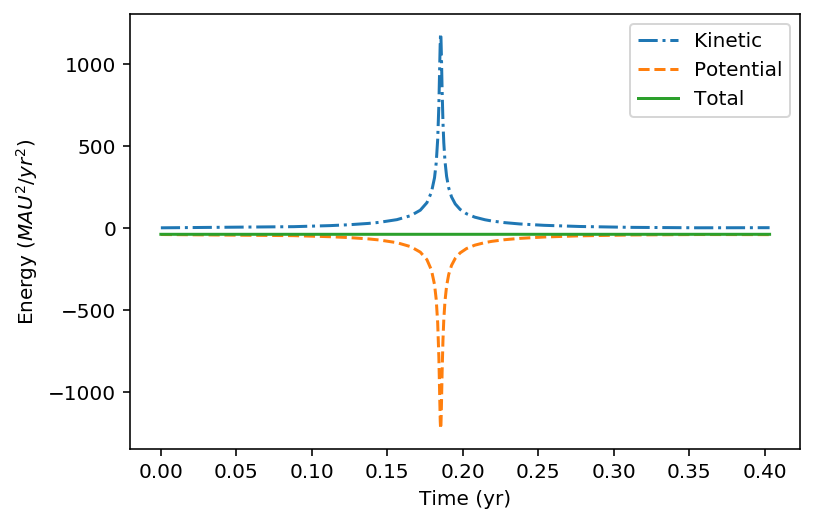

In [161]:
orbit()

I actually do not like the way the author wrote rka. I don't think it follows the section in the book very well. I intend to create a separate function here to perform the adaptive time-step and see how it compares.

In [246]:
def rk4a(x, t, tau, err, derivsRK, param):
    '''
    Adaptive Runge-Kutta routine
    Inputs
    ------
    x            Current value of the dependent variable
    t            Independent variable (usually time)
    tau          Step size (usually time)
    err          Desired fractional local truncation error
    derivsRK     Right-hand side of the ODE; derivsRK is the
                 name of the function that returns dx/dt.
                 Calling format: derivsRK(x, t, param)
    param        Extra parameter passed to derivsRK
    Outputs
    -------
    xSmall       New value of the dependent variable
    t            New value of the independent variable
    tau          Suggested step size for the next call
    '''
    # Set initial variables
    tinit, xinit = t, x   # Initial values
    s1, s2 = 0.9, 4.0     # Initial safety factors  
    eps = 1e-10
    
    # Loop over max number of attempts to satifsy error bound
    xtemp = np.empty(len(x))
    xsmall = np.empty(len(x))
    xbig = np.empty(len(x))
    
    maxtry = 100
    for i in range(maxtry):
        # Take two half-steps
        half_tau = 0.5 * tau
        xtemp = rk4(xinit, tinit, half_tau, derivsRK, param)
        t = tinit + half_tau
        xsmall = rk4(xtemp, t, half_tau, derivsRK, param)
        
        # Take one full step
        t = tinit + tau
        xbig = rk4(xinit, tinit, tau, derivsRK, param)
        
        err_scale = err * (np.abs(xsmall) + np.abs(xbig)) / 2
        error = xbig - xsmall
        error_ratio = np.max(np.abs(error)/(err_scale + eps))
        
#         told = tau
#         tnew = s1 * told * error_ratio**(-0.2)
        
        tau_old = tau
        tau = s1 * tau_old * error_ratio**(-0.2)
#         tau = max(tau, tau_old/s2)
#         tau = min(tau, s2 * tau_old)        
        
        if tau > s2 * tau_old:
            tnew = s2 * tau_old
        elif tau < tau_old / s2:
            tnew = tau_old / s2
        else:
            tnew = tau
            
        if error_ratio < 1.:
            return np.array([xsmall, t, tnew])
    
    print('ERROR: Adaptive Runge-Kutta routine failed')
    return np.array([xsmall, t, tnew])

Enter initial radial distance (AU):  1
Enter initial tangential velocity (AU/yr):  1.5708
Enter number of steps:  40
Enter time step (yr):  0.1
Choose method: 1) Euler; 2) Euler-Cromer; 3) Runga-Kutta; 4) Adaptive Runga-Kutta 4


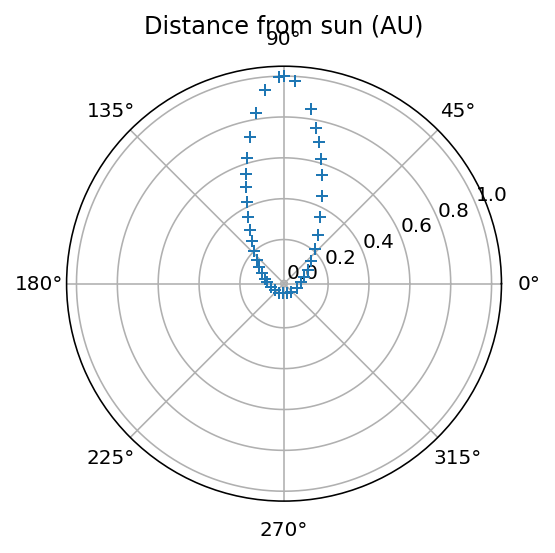

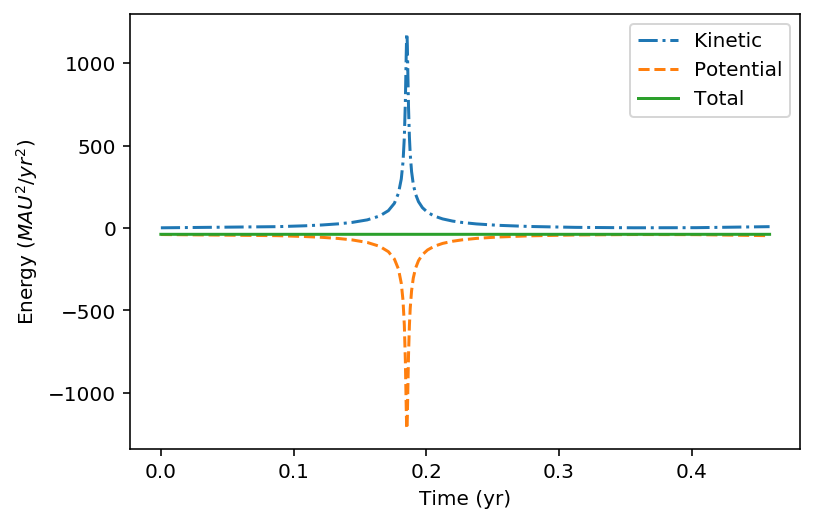

In [247]:
orbit()

## Lessons learned

Trying to develop my own adaptive Runge-Kutta algorithm was difficult, and taught me several important lessons that I would not have learned had I not had a functioning algorithm to compare against.

### Lesson 1: Division by zero

The point of the algorithm is to drive the difference between the whole step prediction and the double half-step prediction to be as small as possible by adjusting the step size dynamically. Therefore, having the error between the two in the denominator of the error ratio was causing division-by-zero problems. A workaround was to do the division of the inverse (error divided by ideal error), and then to take the negative exponent ($errorRatio^{-0.2}$).

### Variables

I attempted to just recycle variable names initially, but that was creating assignment issues for Python. I used 3 variables for use in determining what the time-step would be: tau, tau_old, and tnew. Before, I was using 2 variables, and that just wasn't working. I needed to separate the variables used in the if statements for comparison and updating for return.